# Learning From Data Assignment 2

# Muzzammil Mohammed
# 218014453

In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

In [2]:
#Import sheet from excel and assign it to a dataset
#Note: the data has been cleaned in excel already in order to remove the very far out outliers and fill in missing values
#This has been done in excel because if I import into jupyter and then sort using ds.sort() it does not re arrange the numbering in the first column
ds = pd.read_excel("C:\\Users\\Muzzammil Mohammed\\OneDrive\\Desktop\\LFDSalaries.xlsx")

# Measures Of Location

#### Mean


In [3]:
#Sum all salaries
intTotalSalary = ds['Salary'].sum()
#Get the count of the rows
intRows = len(ds)

mean = intTotalSalary/intRows

print(mean)

584483.9102558172


#### Mode


In [4]:
mode = ds["Salary"].mode().iloc[0]

print(mode)

300000


#### Median

In [5]:
#Data has already been sorted for reasons explained above. If they were not sorted beforehand we would use ds.sort()
#Convert salary column to list
data = ds['Salary'].tolist()
def median(data):
    
    n= len(data)

#Check if the length is an odd number 
    if n%2 == 1:
#Return the middle value, the double slash gets the value and rounds down, and since indices in python lists start at 0, rounding down works        
        return data[n//2]  
    
    else:
#Count is an even number. so find middle two and calculate average
        num1 = data[n//2-1] #Find middle number and subtract one to find the first digit for calculation 
        num2 = data[n//2] #Find second middle digit
        return (num1 + num2)/2 
    
median = median(data)
print(median)


500000


#### Weighted Mean


In [6]:
weightedMean = (ds["Salary"] * ds["Salaries Reported"]).sum() / ds["Salaries Reported"].sum()

print(weightedMean)

554544.233594281


#### Geometric Mean

In [7]:
dsdec = ds["Salary"].apply(Decimal) #Converting Salary column to a decimal. The value is too large to calculate its product
                                    #And returns 0 when doing calculating the product

product = dsdec.prod() #Calculating the product of the decimal
n = len(ds)

#geoMean = product ** (1/n) This would be the standard way to calculate the geometric mean
geoMean = product ** (Decimal('1') / Decimal(n))  #This is the calculation to adjust for the product in decimal
                                                  #The ** operator in python is used for exponentiation
print("Product:", product)
print("Geometric Mean:", geoMean)

Product: 6.444191236309738068132603949E+122302
Geometric Mean: 454688.8039451148061838317550


#### Percentiles

In [8]:
#Calculating the 10th percentile could be done using (10/100) * n, getting the nth and nth + 1 value of this, and getting the ave.

percentiles = []

for i in range(10, 91, 10): #Therefore instead of doing each percentile individually we create a loop that increments in 10
    # Calculate nth value
    p = math.ceil((i / 100) * n)
    
    # Check if p is within the valid index range of the DataFrame
    if p >= len(ds):
        print(f"Percentile {i} is out of bounds")
        continue
    
    # Get the nth value from ds and nth + 1
    value_1 = ds["Salary"].iloc[p - 1]  # Adjust index to get the nth value
    value_2 = ds["Salary"].iloc[p]      # nth + 1 value
    
    # Calculate the average of the two values
    result = (value_1 + value_2) / 2
    
    # Append the result to the list
    percentiles.append(result)

# Print the results and format it to print as "nth percentile: percentile"
for i, result in zip(range(10, 91, 10), percentiles):
    print(f"{i}th percentile: {result}")

10th percentile: 180000.0
20th percentile: 240000.0
30th percentile: 300000.0
40th percentile: 400000.0
50th percentile: 500000.0
60th percentile: 600000.0
70th percentile: 700000.0
80th percentile: 900000.0
90th percentile: 1200000.0


#### Quartiles

In [9]:
#Using the same logic as the percentiles
quartiles = []
count = 0 #Adding a count for the print statement

for i in range(25, 91, 25):
    
    p = math.ceil((i / 100) * n)
    
    if p >= len(ds):
        print(f"Quartile {i} is out of bounds")
        continue
    
    value_1 = ds["Salary"].iloc[p - 1]  
    
    result = value_1
    
    quartiles.append(result)

for i, result in zip(range(25, 91, 25), quartiles):
    count += 1
    print(f"Quartile {count}: {result}")

Quartile 1: 300000
Quartile 2: 500000
Quartile 3: 800000


# Measures Of Variability

#### Range

In [10]:
salaryValues = ds["Salary"].tolist()
minSalary = min(salaryValues)
maxSalary = max(salaryValues)
Range = (maxSalary - minSalary)
print(Range)

1797888


#### Interquartile Range

In [11]:
#Get Q1
nQ1 = math.ceil((25 / 100) * n)
value_1 = ds["Salary"].iloc[nQ1 - 1]  
Q1 = value_1

#Get Q3
nQ3 = math.ceil((75 / 100) * n)
value_2 = ds["Salary"].iloc[nQ3 - 1]  
Q3 = value_2

IQR = Q3 - Q1
print(IQR)

500000


#### Variance

In [12]:
squaredDiffSum = 0
for salary in ds["Salary"]:
    squaredDiffSum += (salary - mean) ** 2 #Subtract the mean from each data point and square the result
                                           #We already have mean calculated from earlier

#Divide the squared difference by n
variance = squaredDiffSum / n

print(variance)

158142215976.03107


#### Standard Deviation

In [13]:
stdDev = math.sqrt(variance)

print(stdDev)

397670.9896082829


#### Coefficient of Variation

In [14]:
coefficientOfVariation = (stdDev / mean) * 100

print(coefficientOfVariation)

68.03797035819687


#### Skewness

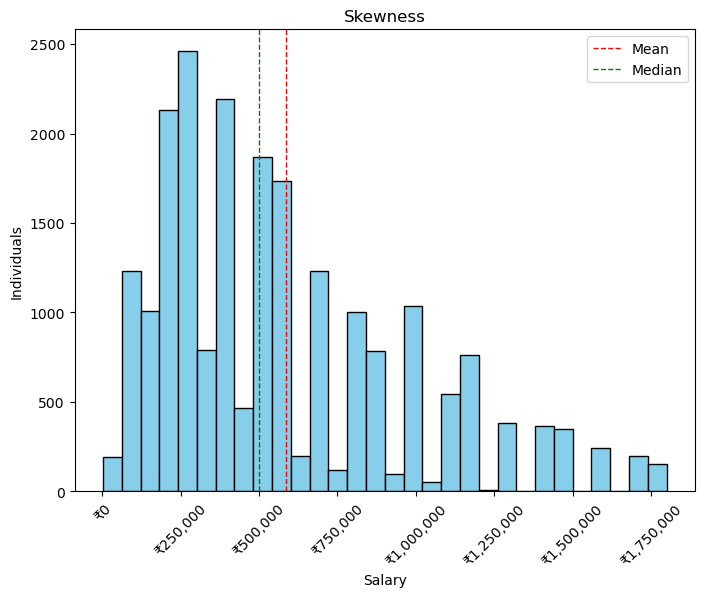

In [15]:
plt.figure(figsize=(8, 6))
plt.hist(ds["Salary"], bins=30, color='skyblue', edgecolor='black')

# Customize x-axis to show actual salaries as previously without this x-axis showed '0, 0.25, 0.5' etc.
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# Format salary numbers with '₹' sign and no decimal places
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '₹{:,.0f}'.format(x)))

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('Individuals')
plt.title('Skewness')

# Adding a line for mean
plt.axvline(ds["Salary"].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')

# Adding a line for median
plt.axvline(ds["Salary"].median(), color='green', linestyle='dashed', linewidth=1, label='Median')

# Adding legend for labels Mean and Median
plt.legend()

# Show plot
plt.show()

This shows that the data is skewed right. This is also accurate as we can see the mean is more than the median
See below for calculation of skewness. The skewness showing 0.99 which is basically 1 supports this as it shows that the
data is skewed right by having a positive number and a relatively higher one


In [16]:
#Skewness calculation is part of my calculations not covered in class

standardizedDeviations = (ds["Salary"] - mean) / stdDev

# Calculate the mean of cubed standardized deviations
meanCubedDeviations = np.mean(standardizedDeviations ** 3)

# Step 4: Divide by the cube of the standard deviation
skewness = meanCubedDeviations

print(skewness)

0.9902099834424821


#### Z-Scores

In [17]:
zScores = [(x - mean) / stdDev for x in ds["Salary"]]
zScores_series = pd.Series(zScores, index=ds.index) 
#I am keeping them in a list and a series in case I need either for future calculations

print(zScores_series)

0       -1.464457
1       -1.448524
2       -1.439592
3       -1.439592
4       -1.439592
           ...   
21612    3.056587
21613    3.056587
21614    3.056587
21615    3.056587
21616    3.056587
Length: 21617, dtype: float64


#### Chebyshevs Theorem

In [18]:
#Define the standard deeviation values so we can use it in a loop instead of one by one
standardDevs = [2, 3, 4]

# Calculate the proportions using Chebyshev's theorem
for z in standardDevs:
    proportion_within_z_std_dev = 1 - 1 / z**2
    
    print(f"At least {proportion_within_z_std_dev * 100:.2f}% of the data falls within {z} standard deviations of the mean.")

At least 75.00% of the data falls within 2 standard deviations of the mean.
At least 88.89% of the data falls within 3 standard deviations of the mean.
At least 93.75% of the data falls within 4 standard deviations of the mean.


#### Detecting Outliers

In [19]:
#Using |z|>3. The formula below finds all the values where the z score is greater than 3
#Sidenote: There were no z-scores less than -3 that's why I only did it for greater than 3
rows_greater_than_3 = zScores_series[zScores_series > 3]

#The values from that equation started at the 21462nd row

#Find 21462nd row salary in ds["Salary"]
value_21462 = ds["Salary"].iloc[21461]  

print("Outliers are all salaries greater than:", value_21462)


Outliers are all salaries greater than: 1700000


#### Covariance

In [20]:
#Get the mean for the Rating column as we do not have it yet
meanRating = ds["Rating"].mean()

#Calculate the deviations from means
cov1 = ds["Salary"] - mean
cov2 = ds["Rating"] - meanRating

covariance = (cov1 * cov2).sum() / (n-1)

print(covariance)

5886.424670273317


This shows a positive relationship between the Salary and the Company Rating

#### Correlation Coefficient

In [21]:
#Get the standard deviation for ratings column as we do not have it already
ratingStdDev = ds["Rating"].std()

correlationCoefficient = covariance / (stdDev * ratingStdDev)

print(correlationCoefficient)

0.0283523120579377


This indicates a positive linear relationship

#### Five Number Summary

In [22]:
#Get the smallest and largest value. We already have all the other vlaues from previous calculations
minSalary = ds["Salary"].min()
maxSalary = ds["Salary"].max()

# Assign the values to a list
lstFiveNumberSummary = [minSalary, Q1, median, Q3, maxSalary]

# Create a DataSet with the values
dsFiveNumberSummary = pd.DataFrame({"Salary": lstFiveNumberSummary}, index=["Min Value", "First Quartile", "Median", "Third Quartile", "Largest Value"])

# Display the DataSet
print(dsFiveNumberSummary)
print(lstFiveNumberSummary)

                 Salary
Min Value          2112
First Quartile   300000
Median           500000
Third Quartile   800000
Largest Value   1800000
[2112, 300000, 500000, 800000, 1800000]


### Descriptive Stats not covered in class

#### Kurtosis

In [23]:
kurtosis = (n * (n + 1) / ((n - 1) * (n - 2) * (n - 3))) * \
                  (((((ds["Salary"] - mean) / stdDev) ** 4).sum()) - \
                  (3 * ((n - 1) ** 2) / ((n - 2) * (n - 3))))


print(kurtosis)

3.3104983213349453


Kurtosis is  A measure of the "tailedness" of the distribution of values in a dataset. 
A kurtosis value of 3.31 suggests hevaier tails than that of a normal distribution and a high level of peakedness.
This indicates that the dataset is non-normal and likely has extreme outliers
This makes sense as we already know that we have outliers which consist of all of the salaries that are above 1 700 000.

# Graphs

#### Box Plot

The first graph should be ignored. I have left it in to show my process. I did it first using my Five Number Summary and then realised it did not generate mupper level whisker using this, so I used my dataset instead on the next graph.

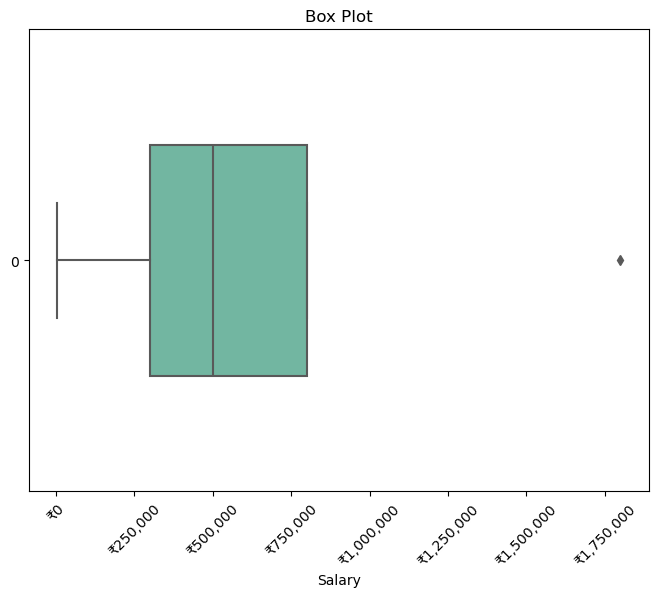

In [24]:
#IGNORE THIS ONE

# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))

# Same code as earlier to show the salaries on the x-axis
plt.xticks(rotation=45) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '₹{:,.0f}'.format(x)))

sns.boxplot(data=lstFiveNumberSummary, orient="h", width=0.5, palette="Set2", whis=1.5) #Using Five Number Summary
plt.xlabel("Salary")
plt.title("Box Plot")
plt.show()

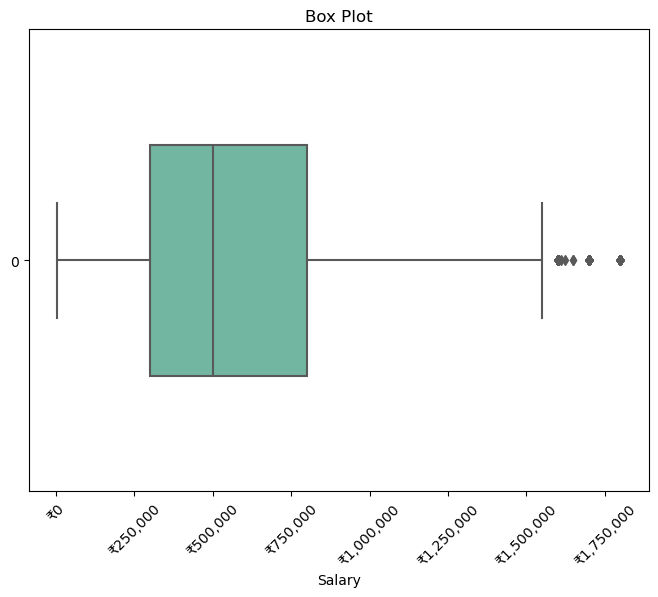

In [25]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))

# Same code as earlier to show the salaries on the x-axis
plt.xticks(rotation=45) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '₹{:,.0f}'.format(x)))

sns.boxplot(data=ds["Salary"], orient="h", width=0.5, palette="Set2", whis=1.5) #Using dataset
plt.xlabel("Salary")
plt.title("Box Plot")
plt.show()

Above is a box which shows all our quartiles. Q1: 300 000, median: 500 000, Q3: 800 000.
We can also see that all values above 1 700 000 are marked as outliers. This confirms our earlier calculation and conclusion that all values above 1 700 000 are outliers

#### Scatter Plot

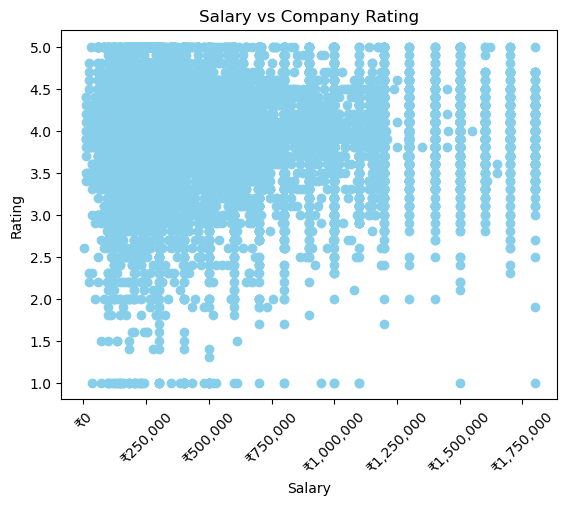

In [26]:
plt.scatter(ds["Salary"], ds["Rating"], color='skyblue')

plt.xticks(rotation=45) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '₹{:,.0f}'.format(x)))

plt.title('Salary vs Company Rating')
plt.xlabel('Salary')
plt.ylabel('Rating')

plt.show()

#### Emperical Rule

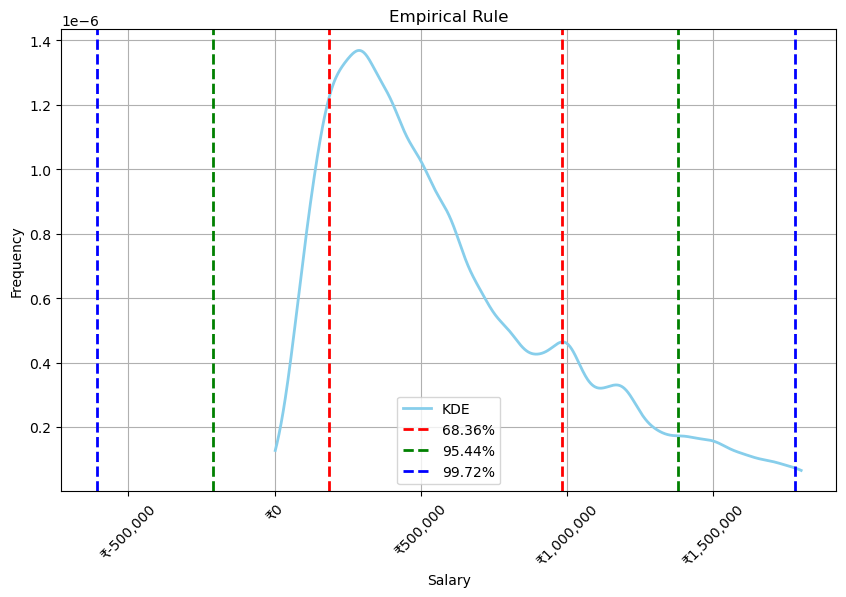

In [27]:
salary_values = ds["Salary"].values

# Handle infinite values if necessary
salary_values = salary_values[~np.isinf(salary_values)]

# Define ranges for one, two, and three standard deviations (68.26, 95.44, 99.72 rule)
one_std_range = (mean - stdDev, mean + stdDev)
two_std_range = (mean - 2 * stdDev, mean + 2 * stdDev)
three_std_range = (mean - 3 * stdDev, mean + 3 * stdDev)

# Create a kernel density estimate (KDE) of the data
kde = gaussian_kde(salary_values)

# Plot the KDE curve
x_vals = np.linspace(salary_values.min(), salary_values.max(), 1000)
plt.figure(figsize=(10, 6))
plt.plot(x_vals, kde(x_vals), color='skyblue', linewidth=2, label='KDE')

plt.xticks(rotation=45) 
plt.gca().get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: '₹{:,.0f}'.format(x)))

# Plot lines for one, two, and three standard deviations
plt.axvline(x=one_std_range[0], color='red', linestyle='--', linewidth=2, label='68.36%')
plt.axvline(x=one_std_range[1], color='red', linestyle='--', linewidth=2)
plt.axvline(x=two_std_range[0], color='green', linestyle='--', linewidth=2, label='95.44%')
plt.axvline(x=two_std_range[1], color='green', linestyle='--', linewidth=2)
plt.axvline(x=three_std_range[0], color='blue', linestyle='--', linewidth=2, label='99.72%')
plt.axvline(x=three_std_range[1], color='blue', linestyle='--', linewidth=2)

# Add legend and labels
plt.legend()
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Empirical Rule')

# Show plot
plt.grid(True)
plt.show()

# Reflections

#### Personal

The experience of analysing data for me personally was so much different between using Excel vs using Python. I thoroughly enjoyed analysing the data and doing all of the different calculations in Python, much more than in excel especially considering that we had to do these calculations manually. The reason for this is because I found is so much easier to work with variables, write equations and all these things using python code instead of writing them in excel formulas. This could possibly be due to the fact that bot activities were fairly new to me, but my undergraduate bachelors degree is in Computer Science and I work as a Software Engineer, so maybe it's just that because of this, the coding came more naturally to me. But all in all I found it much easier, exciting, and fun to do in Python because it is just such a powerful language, and I loved being able to experiment different and fancier ways to come to the answers. All of a sudden not being able to use the libraries and having to do the calculations manually became a positive. I think another reason I enjoyed it more was that Python is a language I have been wanting to learn for a while now but never got the chance, so this gave me the opportunity to do that and experiment with the language.

#### Differences

As mentioned above I think one of the key differences is the use of variables in Python vs Cells in excel. It might differ between individuals but personally I much prefer the variables.
Another key difference is the Graphs. These are much simpler and quicker in excel. In excel you have all of these graphs built in that you can just point and click and make some adjustments. With python this was alot more challenging, especially because it was my first time using the language let alone using it to generate graphs

#### When will you use either

I think for large datasets, complex analysis and calculations and automation in terms of creating loops etc. I'd use python

For more simple calculations, less technical users or if the main aim is to provide visualisations, for this I would use excel

#### What would you do differently

I'd maybe choose a datset with a few more variables that influence and affect each other as this would allow me to do things like linear regression etc. This was not possible with the dataset I used.  